<a href="https://colab.research.google.com/github/rahul4070/CIFAR_10/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
# Load CIFAR10 Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]

X_train =  X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

num_classes = 10

# convert to one hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes) 

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
model = Sequential()
weight_decay = 1e-4
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

 
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
# model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2,2)))

 
model.add(Flatten())
# model.add(Dense(512,activation='elu',))
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       295168    
                                                        

In [6]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

traindataGen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

testdataGen = ImageDataGenerator(shear_range=0.2,zoom_range=0.2,
height_shift_range=0.1,horizontal_flip=True)

traindataGen.fit(X_train)
testdataGen.fit(X_test)

In [7]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [8]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 10:
        lrate = 0.0009
    if epoch > 20:
        lrate = 0.0007
    if epoch > 30:
        lrate = 0.0003
    if epoch > 40:
        lrate = 0.00007

    return lrate

In [10]:
import math
from tensorflow.keras.callbacks import ReduceLROnPlateau, CSVLogger, LearningRateScheduler

lrPlateau = ReduceLROnPlateau(monitor='val_accuracy', factor=(0.1), patience=2)


csv_logger = CSVLogger('training.log')

callbacks_list=[LearningRateScheduler(lr_schedule)]

batch_size=64

model_history = model.fit(traindataGen.flow(X_train,y_train,batch_size=32),
                    batch_size=batch_size,
                    epochs=70,
                    steps_per_epoch=math.ceil(len(X_train) / batch_size),
                    verbose=1, 
                    validation_data=(X_test,y_test),
                    callbacks = callbacks_list)

Epoch 1/70
782/782 [==============================] - 54s 63ms/step - loss: 2.2754 - accuracy: 0.3965 - val_loss: 3.2414 - val_accuracy: 0.3899 - lr: 0.0010
Epoch 2/70
782/782 [==============================] - 44s 56ms/step - loss: 1.7373 - accuracy: 0.5445 - val_loss: 2.0676 - val_accuracy: 0.5633 - lr: 0.0010
Epoch 3/70
782/782 [==============================] - 44s 56ms/step - loss: 1.5555 - accuracy: 0.6107 - val_loss: 1.4799 - val_accuracy: 0.6358 - lr: 0.0010
Epoch 4/70
782/782 [==============================] - 44s 57ms/step - loss: 1.3110 - accuracy: 0.6598 - val_loss: 1.3541 - val_accuracy: 0.6534 - lr: 0.0010
Epoch 5/70
782/782 [==============================] - 44s 56ms/step - loss: 1.1814 - accuracy: 0.6990 - val_loss: 1.1985 - val_accuracy: 0.7047 - lr: 0.0010
Epoch 6/70
782/782 [==============================] - 44s 56ms/step - loss: 1.1154 - accuracy: 0.7173 - val_loss: 1.1103 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 7/70
782/782 [==============================] - 43s 

In [11]:
# Test the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 19ms/step - loss: 0.4646 - accuracy: 0.9106
Test loss: 0.46456941962242126
Test accuracy: 0.9106000065803528


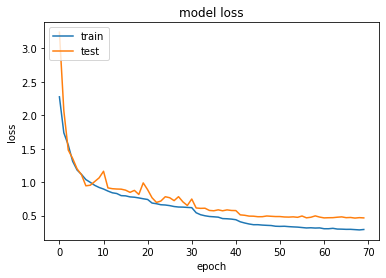

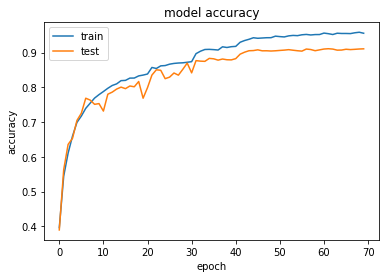

In [12]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Save the trained weights in to .h5 format
model.save_weights("DNST_model.h5")
print("Saved model to disk")

Saved model to disk
